<div style="display: table; width: 100%;">
  <div style="display: table-cell; text-align: center; vertical-align: middle; width: 70%;">
    <h1>Visualización Avanzada de Datos en Data Science</h1>
  </div>
  <div style="display: table-cell; text-align: center; vertical-align: middle; width: 30%;">
    <img src="https://raw.githubusercontent.com/UIDE-Tareas/3-Visualizacion-Avanzada-Datos-Data-Science-Tarea1/refs/heads/main/Assets/UideLogo.png" alt="Texto alternativo" style="width:50%;">
  </div>
</div>
<hr />

### 🟦 Componente Práctico 1   
🟡 Grupo: 4      
🟡 Semana: 1      
🟡 Docente: Edwin Jahir Rueda Rojas(edruedaro@uide.edu.ec)     

### 🟦 Realizado por:   
Estudiantes

💻 Diego Fernando Chimbo Yepez   

💻 Hugo Javier Erazo Granda

💻 José Manuel Espinoza Bone

### 🟦 Código fuente
[https://github.com/UIDE-Tareas/3-Visualizacion-Avanzada-Datos-Data-Science-Tarea1](https://github.com/UIDE-Tareas/3-Visualizacion-Avanzada-Datos-Data-Science-Tarea1)

# FASE 0️⃣ PREPARAR EL AMBIENTE

Aquí instalamos las dependencias externas que no se encuentran en la biblioteca estándar de Python para lograr que el presente notebook se puede ejecutar sin problemas, aparte se definen algunas funciones para usar a lo largo del notebook.

In [15]:
import sys
import subprocess
import argparse
import os
from pathlib import Path

LIBS = [
    "requests",
    "numpy",
    "pandas",
    "seaborn",
    "matplotlib",
]

def RunCommand(commandList: list[str], printCommand: bool = True, printError:bool=True) -> subprocess.CompletedProcess:
    print("⏳", " ".join(commandList))
    stdOutput = None if printCommand else subprocess.DEVNULL
    errorOutput = None if printError else subprocess.PIPE
    result = subprocess.run(commandList,stdout=stdOutput, stderr=errorOutput, text=True)
    if result.returncode != 0 and printError:
        print(result.stderr) 
    return result

def ShowEnvironmentInfo():
    print("ℹ️  Environment Info:")
    print("Python Version:", sys.version)
    print("Platform:", sys.platform)
    print("Executable Path:", sys.executable)
    print("Current Working Directory:", os.getcwd())
    print("VIRTUAL_ENV:", os.environ.get("VIRTUAL_ENV"))
    print("sys.prefix:", sys.prefix)
    print("sys.base_prefix:", sys.base_prefix)

def InstallDeps():
    print("ℹ️ Installing deps.")
    RunCommand([sys.executable, "-m", "pip", "install", "--upgrade", "pip"], printCommand=True) 
    RunCommand([sys.executable, "-m", "pip", "install", *LIBS], printCommand=True) 
    print("Deps installed.")

ShowEnvironmentInfo()
InstallDeps()

import numpy as np
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import zipfile

pandas.set_option("display.max_rows", None)     # Muestra todas las filas
pandas.set_option("display.max_columns", None)

# Función para mostrar mensajes de información.
def ShowInfoMessage(message: str):
    display()
    display(f"ℹ️ {message}".upper())

# Función para mostrar la información del DataFrame.
def ShowTableInfo(df:pandas.DataFrame, title):
    display(f"ℹ️ {title} ℹ️".upper())
    df.info()
    display()

# Función para mostrar las n primeras filas del DataFrame.
def ShowTableHead(df:pandas.DataFrame, title:str, headQty=10):
    display(f"ℹ️ {title.upper()}: Primeros {headQty} elementos.")
    display(df.head(headQty))
    display()

# Función para mostrar las n últimas filas del DataFrame.
def ShowTableTail(df:pandas.DataFrame,title:str ,tailQty=10):
    display(f"ℹ️ {title.upper()}: Últimos {tailQty} elementos.")
    display(df.tail(tailQty))
    display()

# Mostrar el tamaño del DataFrame
def ShowTableShape(df:pandas.DataFrame, title:str):
    display(f"ℹ️ {title.upper()} - Tamaño de los datos")
    display(df.shape)
    display()

# Función para mostrar la estadística descriptiva de todas las columnas del DataFrame, por tipo de dato.
def ShowTableStats(df: pandas.DataFrame, title:str = ""):
    display(f"ℹ️ Estadística descriptiva - {title}".upper())
    numeric_types = ['int64', 'float64', 'Int64', 'Float64']
    numeric_cols = df.select_dtypes(include=numeric_types)
    if not numeric_cols.empty:
        display("    🔢 Columnas numéricas")
        numeric_desc = numeric_cols.describe().round(2).T  # Transpuesta para añadir columna
        numeric_desc["var"] = numeric_cols.var().round(2)  # Añadir varianza
        display(numeric_desc.T) 
    non_numeric_types = ['object', 'string', 'bool', 'category']
    non_numeric_cols = df.select_dtypes(include=non_numeric_types)
    if not non_numeric_cols.empty:
        display("    🔡 Columnas no numéricas")
        non_numeric_desc = non_numeric_cols.describe()
        display(non_numeric_desc)
    datetime_cols = df.select_dtypes(include=['datetime'])
    if not datetime_cols.empty:
        display("    📅 Columnas fechas")
        datetime_desc = datetime_cols.describe()
        display(datetime_desc)

# Función para mostrar los valores nulos o NaN de cada columna en un DataFrame
def ShowNanValues(df: pandas.DataFrame):
    display(f"ℹ️ Contador de valores Nulos".upper())
    nulls_count = df.isnull().sum()
    nulls_df = nulls_count.reset_index()
    nulls_df.columns = ['Columna', 'Cantidad_Nulos']
    display(nulls_df)
    display()


# Función para descargar un archivo
def DownloadFile(uri: str, filename: str):
    display(f"🟦 Descargando \"{uri}\"")
    try:
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        respuesta = requests.get(uri)
        respuesta.raise_for_status() 
        with open(filename, 'wb') as archivo:
            archivo.write(respuesta.content)
        display(f"archivo \"{filename}\" fue descargado exitosamente.")
    except requests.exceptions.RequestException as e:
        display(f"Error downloading file: {e}")

# Función para descomprimir un archivo zip
def UnzipFile(filename: str, outputDir: str):
    display(f'🟦 Descomprimiendo "{filename}" en "{outputDir}"')
    try:
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall(outputDir)
        display(f"Descomprimido en: {os.path.abspath(outputDir)}")
    except Exception as e:
        display(f"Error: {e}")

# Función para mostrar un texto con colores dependiendo del valor de la condición. Verde si es True, rojo si es False.
def PrintAssert(message: str, boolExpression: bool):
    VERDE = "\033[92m"
    ROJO = "\033[91m"
    RESET = "\033[0m"
    if boolExpression:
        print(f"{VERDE}✅ {message}{RESET}")
    else:
        print(f"{ROJO}🚫 {message}{RESET}")

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

ℹ️  Environment Info:
Python Version: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
Platform: win32
Executable Path: c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe
Current Working Directory: c:\Users\Megam\OneDrive\Escritorio\3-Visualizacion-Avanzada-Datos-Data-Science-Tarea1
VIRTUAL_ENV: None
sys.prefix: c:\Users\Megam\AppData\Local\Programs\Python\Python313
sys.base_prefix: c:\Users\Megam\AppData\Local\Programs\Python\Python313
ℹ️ Installing deps.
⏳ c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
⏳ c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install requests numpy pandas seaborn matplotlib
Deps installed.


# FASE 1️⃣ CARGA Y LIMPIEZA DE DATOS

### Descargar y Cargar los datos
- Los datos son descargados desde un repositorio público. Cuenta con 10000+ aplicaciones de google playstore y 13 caracteristicas:
    - App: Nombre de la aplicación
    - Categoría: Categoría dentro de google playstore a la cual pertenece la aplicación.
    - Rating: Calificación promedio dada por los usuarios de google playstore
    - Reviews: Total de comentarios de la aplicación.
    - Size: Tamaño de la aplicación en Kb.
    - Installs: Total de instalaciones de la aplicación.
    - Type: si es gratuita o de pago.
    - Price: Precio de la aplicación en dólares.
    - Content Rating: clasificación de la aplicación en base a su contenido.
    - Genres: Géneros dentro de google playsotre a los que pertenece la aplicación.
    - Last Updated: Fecha de la última actualización de la aplicación.
    - Current Ver: Versión actual de la aplicación.
    - Android Ver: Versión de android que soporta la aplicación.

In [16]:
#DATASET_URI = "https://raw.githubusercontent.com/UIDE-Tareas/3-Visualizacion-Avanzada-Datos-Data-Science-Tarea1/refs/heads/main/Datasets/googleplaystore_v2.csv"
DATASET_URI = "https://github.com/rusheel98/Data-Visualization-on-google-play-store-reviews-dataset/raw/main/googleplaystore_v2.csv"
DATASET_FILE = Path("Data/googleplaystore_v2.csv").resolve()
DownloadFile(DATASET_URI, DATASET_FILE)

dfOriginal = pd.read_csv(DATASET_FILE)
data = dfOriginal.copy()

ShowTableInfo(data, "DataFrame Original")
ShowTableHead(data, "DataFrame Original", 10)
ShowTableShape(data, "DataFrame Original")

'🟦 Descargando "https://github.com/rusheel98/Data-Visualization-on-google-play-store-reviews-dataset/raw/main/googleplaystore_v2.csv"'

'archivo "C:\\Users\\Megam\\OneDrive\\Escritorio\\3-Visualizacion-Avanzada-Datos-Data-Science-Tarea1\\Data\\googleplaystore_v2.csv" fue descargado exitosamente.'

'ℹ️ DATAFRAME ORIGINAL ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


'ℹ️ DATAFRAME ORIGINAL: Primeros 10 elementos.'

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


'ℹ️ DATAFRAME ORIGINAL - Tamaño de los datos'

(10841, 13)

### Limpieza y manejo de datos preliminares

In [17]:
data = dfOriginal.copy()
# eliminar registros de las filas con celda NaN
data = data.dropna()

# Cambiar nombres de columnas para evitar espacios
data.columns = [col.strip().replace(" ", "") for col in data.columns] # "Last Updated", "Current Ver", "Android Ver"

# Corregir los tipos de datos incorrectos para las columnas
data.App = data.App.astype(pandas.StringDtype()).str.strip()
data.Category = data.Category.astype(pandas.StringDtype()).str.strip()
data.Rating = data.Rating.astype(pandas.Float64Dtype())
data.Reviews = data.Reviews.astype(pandas.Int64Dtype())
data.Size = data.Size.round().astype(pandas.Int64Dtype())
data.Installs = data.Installs.apply(lambda x: x.strip().replace("+","").replace(",","")).astype(pandas.Float64Dtype())
data.Type = data.Type.apply(lambda x: x.strip()).astype(pandas.StringDtype())
data.Price = data.Price.apply(lambda x: x.strip().replace("$","")).astype(pandas.Float64Dtype())
data.ContentRating = data.ContentRating.astype(pandas.StringDtype()).str.strip()
data.Genres = data.Genres.astype(pandas.StringDtype()).str.strip()
data.LastUpdated = pandas.to_datetime(data.LastUpdated.astype(pandas.StringDtype()), format=f"%B %d, %Y", errors="raise") 
data.CurrentVer = data.CurrentVer.astype(pandas.StringDtype()).str.strip()
data.AndroidVer = data.AndroidVer.astype(pandas.StringDtype()).str.replace("and up","").str.strip()

ShowTableInfo(data, "DataFrame sin nulos y tipos corregidos")
ShowTableHead(data, "DataFrame sin nulos y tipos corregidos")


'ℹ️ DATAFRAME SIN NULOS Y TIPOS CORREGIDOS ℹ️'

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   App            9360 non-null   string        
 1   Category       9360 non-null   string        
 2   Rating         9360 non-null   Float64       
 3   Reviews        9360 non-null   Int64         
 4   Size           9360 non-null   Int64         
 5   Installs       9360 non-null   Float64       
 6   Type           9360 non-null   string        
 7   Price          9360 non-null   Float64       
 8   ContentRating  9360 non-null   string        
 9   Genres         9360 non-null   string        
 10  LastUpdated    9360 non-null   datetime64[ns]
 11  CurrentVer     9360 non-null   string        
 12  AndroidVer     9360 non-null   string        
dtypes: Float64(3), Int64(2), datetime64[ns](1), string(7)
memory usage: 1.0 MB


'ℹ️ DATAFRAME SIN NULOS Y TIPOS CORREGIDOS: Primeros 10 elementos.'

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000,50000.0,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000,1000000.0,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100,10000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3


### Controles de verificación de los datos

Sirve para asegurarnos de que nuestros datos cumplan reglas lógicas presentes en nuestros negocios o proyectos.

En el caso de este proyecto se tiene que:


1.   La valoración está entre 1 y 5 para todas las aplicaciones.
2.   El número de opiniones es menor o igual que el número de instalaciones.
3.   Las aplicaciones gratuitas no deben tener un precio superior a 0.

In [18]:
ShowInfoMessage("Verificando datos")
result = data.Rating.between(0,5).all()
PrintAssert("Calificaciones están entre 0 y 5", result)
if not result:
    data = data[data.Rating.between(0,5)]
    result = data.Rating.between(0,5).all()
    PrintAssert("Corregido Calificaciones están entre 0 y 5", data.Rating.max()<=5 and data.Rating.min()>=0, result)

result = data.Size.min()>=0
PrintAssert("Tamaño de archivo solo valores positivos", result)
if not result:
    data = data[data.Size>=0]
    result = data.Size.min()>=0
    PrintAssert("Corregido Tamaño de archivo solo valores positivos", result)

result = (data.Reviews <= data.Installs).all()
PrintAssert("Las Reviews deben ser menor al número de instalaciones", result)
if not result:
    data = data[data.Reviews <= data.Installs]
    result = (data.Reviews <= data.Installs).all()
    PrintAssert("===> 🔨 Las Reviews deben ser menor al número de instalaciones. FIXED.", result)

result = (data[data.Type == "Free"].Price == 0).all()
PrintAssert("Las aplicaciones gratuitas deben tener precio 0", result)
if not result:
    data.loc[data.Type == "Free", "Price"] = 0
    result = (data[data.Type == "Free"].Price == 0).all()
    PrintAssert("Corregido Las aplicaciones gratuitas deben tener precio 0", result)

ShowTableShape(data, "Data verificado")

'ℹ️ VERIFICANDO DATOS'

✅ Calificaciones están entre 0 y 5
✅ Tamaño de archivo solo valores positivos
🚫 Las Reviews deben ser menor al número de instalaciones
✅ ===> 🔨 Las Reviews deben ser menor al número de instalaciones. FIXED.
✅ Las aplicaciones gratuitas deben tener precio 0


'ℹ️ DATA VERIFICADO - Tamaño de los datos'

(9353, 13)

### Haciendo uso de la visualización para eliminar Outliers o valores atípicos

Es recomendable eliminar los valores extremos en nuestros datos para evitar
sesgos en los respectivos análisis y perspectivas erradas. Aquí podemos hacer
uso de los gráficos de visualización vistos en clase para identificar estos
valores.

### **⁉️ Pregunta 1.** ¿Qué gráfico es adecuado para revisar los valores atípicos de la variable `Price`?

> Un diagrama de **Caja y Bigote (Boxplot)**

### **⁉️ Pregunta 2.** ¿Porqué consideran que el gráfico seleccionado permite identificar outliers?

> - Muestra de mejor manera el **rango intercuartílico (IQR)**, que es el estadístico que comunmente se usa para definir outliers.
> - Delimita los valores extremos minimos y máximos en los bigotes.
> - Muestra, los extremos inferiores están determinados por Q1 − 1.5 × IQR y el superior por Q3 + 1.5 × IQR, los extremos son graficados en ambos lados por la línea perpendicular al bigote, si algún dato se encuentra fuera de los bigotes se denomina outlier. El diagrama BoxPlot grafica esos valores outliers.
> - Los valores fuera de los valores extremos se muestran como **puntos individuales**, lo que permite apreciar visualmente cómo se alejan del 50% de la concentración de los valores.
> - Además, muestra la **mediana** y la **asimetría** de la distribución de datos, lo que ayuda a entender si los outliers están generando algún sesgo y hacia donde va ese sesgo.
>
> Resumiendo
> - Caja = rango intercuartílico (Q1–Q3).
> - Línea en medio de la caja = mediana (Q2).
> - "Bigotes" = límites extremos aceptables (Q1 − 1.5·IQR y Q3 + 1.5·IQR).
> - Puntos fuera de los bigotes = outliers.


### **⁉️ Pregunta 3.** Para fines del componente práctico, consideraremos que todos los datos por debajo o encima de los límites inferiores o superiores del rango intercuartílico serán considerados outliers. Elimina estos datos. ¿Cúantos registros eran? (Considera solo la variable `Price`)

**Nota: Para responder la pregunta 3, primero filtra los datos dejando únicamente las aplicaciones de pago**

**Nota: Supondremos un rango intercuartílico leve, donde el extremo inferior está dado por:**
$$Q_1-1.5*IQR$$
y el extremo superior por:
$$Q_3 + 1.5*IQR$$

donde $$IQR=Q_3-Q_1$$

**Nota:** Puedes usar Matplotlib, seaborn o pandas plotting   
**hint:** Usar gráficos que me permitan revisar distribuciones    
Realicen el mismo procedimiento anterior pero ahora para las variables:    
*   ```Reviews```
*   ```Installs```
*   ```Size```     
**Nota**: recuerda, estamos filtrando outliers en base al rango intercuartílico.

'ℹ️ 📊📊📊 ANÁLISIS Y GRÁFICO DE LA COLUMNA PRICE'

'ℹ️ REGISTROS ORIGINALES  SIN ELIMINAR OUTLIERS: 642'

'ℹ️ Q1 ORIGINAL = 1.99'

'ℹ️ Q3 ORIGINAL= 4.99'

'ℹ️ IQR ORIGINAL = 3.0'

'ℹ️ EXTREMO INFERIOR ORIGINAL= -2.51'

'ℹ️ EXTREMO SUPERIOR ORIGINAL = 9.49'

'ℹ️ MÁXIMO ORIGINAL= 0.99'

'ℹ️ MÍNIMO ORIGINAL = 400.0'

'ℹ️ REGISTROS LUEGO DE ELIMINAR OUTLIERS: 553'

'ℹ️ Q1 NUEVO = 1.5'

'ℹ️ Q3 NUEVO= 3.99'

'ℹ️ IQR NUEVO = 2.49'

'ℹ️ EXTREMO INFERIOR NUEVO = -2.2350000000000003'

'ℹ️ EXTREMO SUPERIOR NUEVO = 7.7250000000000005'

'ℹ️ MÁXIMO NUEVO = 0.99'

'ℹ️ MÍNIMO NUEVO = 9.0'

'ℹ️ TOTAL ELIMINADOS: 89'

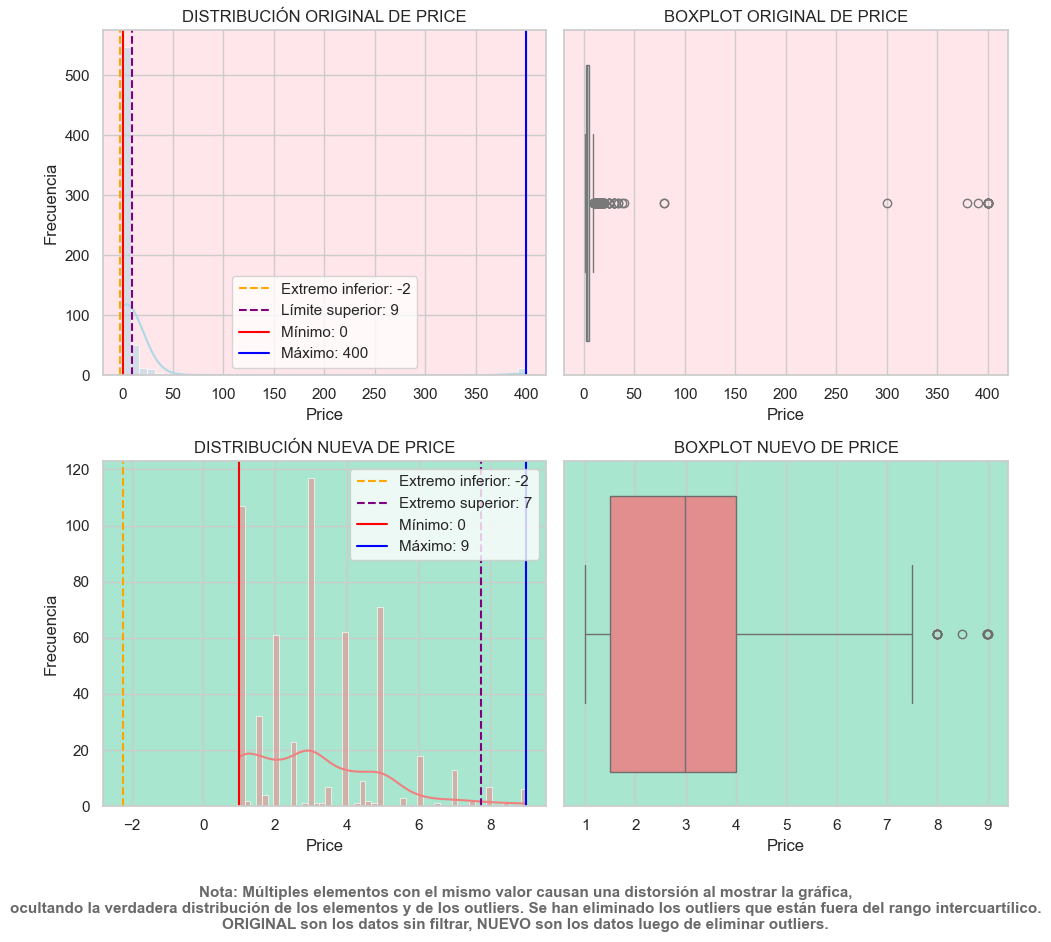

'ℹ️ 📊📊📊 ANÁLISIS Y GRÁFICO DE LA COLUMNA REVIEWS'

'ℹ️ REGISTROS ORIGINALES  SIN ELIMINAR OUTLIERS: 9353'

'ℹ️ Q1 ORIGINAL = 187.0'

'ℹ️ Q3 ORIGINAL= 81747.0'

'ℹ️ IQR ORIGINAL = 81560.0'

'ℹ️ EXTREMO INFERIOR ORIGINAL= -122153.0'

'ℹ️ EXTREMO SUPERIOR ORIGINAL = 204087.0'

'ℹ️ MÁXIMO ORIGINAL= 1'

'ℹ️ MÍNIMO ORIGINAL = 78158306'

'ℹ️ REGISTROS LUEGO DE ELIMINAR OUTLIERS: 7719'

'ℹ️ Q1 NUEVO = 101.0'

'ℹ️ Q3 NUEVO= 23076.0'

'ℹ️ IQR NUEVO = 22975.0'

'ℹ️ EXTREMO INFERIOR NUEVO = -34361.5'

'ℹ️ EXTREMO SUPERIOR NUEVO = 57538.5'

'ℹ️ MÁXIMO NUEVO = 1'

'ℹ️ MÍNIMO NUEVO = 203130'

'ℹ️ TOTAL ELIMINADOS: 1634'

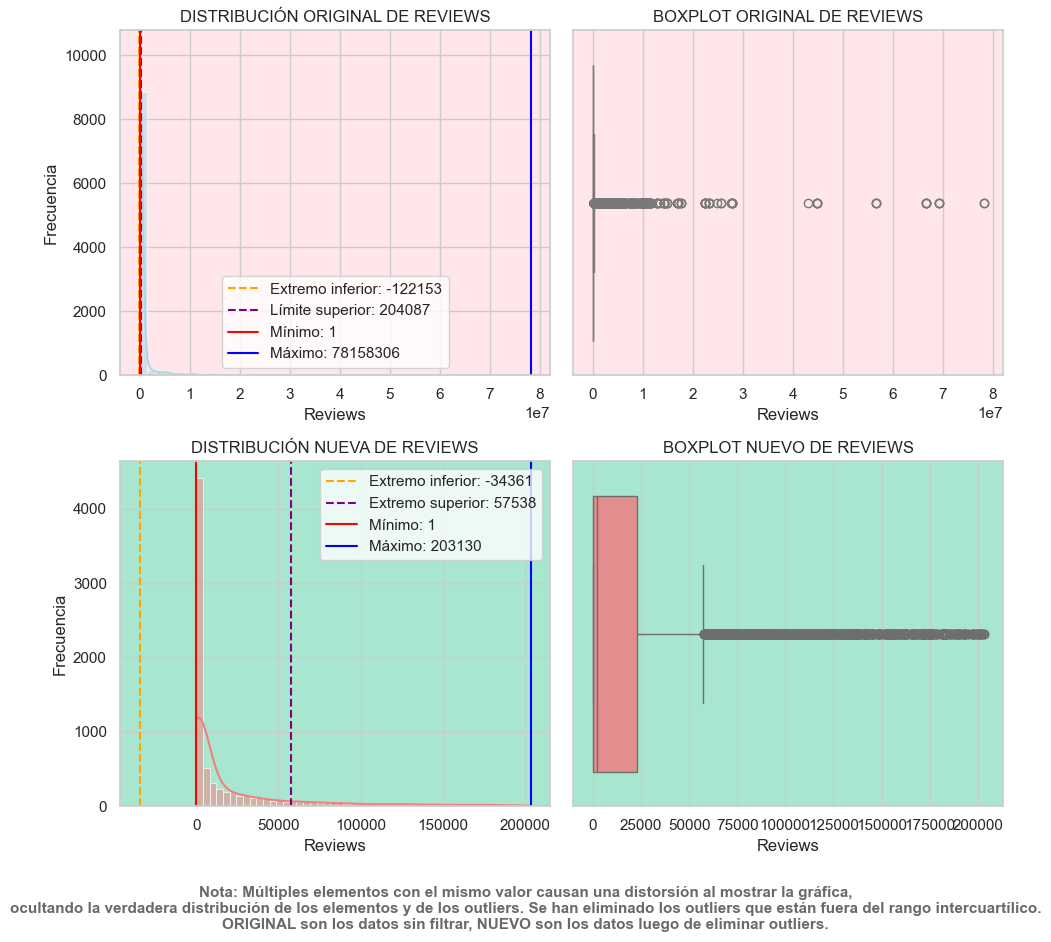

'ℹ️ 📊📊📊 ANÁLISIS Y GRÁFICO DE LA COLUMNA SIZE'

'ℹ️ REGISTROS ORIGINALES  SIN ELIMINAR OUTLIERS: 9353'

'ℹ️ Q1 ORIGINAL = 6600.0'

'ℹ️ Q3 ORIGINAL= 27000.0'

'ℹ️ IQR ORIGINAL = 20400.0'

'ℹ️ EXTREMO INFERIOR ORIGINAL= -24000.0'

'ℹ️ EXTREMO SUPERIOR ORIGINAL = 57600.0'

'ℹ️ MÁXIMO ORIGINAL= 8'

'ℹ️ MÍNIMO ORIGINAL = 100000'

'ℹ️ REGISTROS LUEGO DE ELIMINAR OUTLIERS: 8554'

'ℹ️ Q1 NUEVO = 5900.0'

'ℹ️ Q3 NUEVO= 22000.0'

'ℹ️ IQR NUEVO = 16100.0'

'ℹ️ EXTREMO INFERIOR NUEVO = -18250.0'

'ℹ️ EXTREMO SUPERIOR NUEVO = 46150.0'

'ℹ️ MÁXIMO NUEVO = 8'

'ℹ️ MÍNIMO NUEVO = 57000'

'ℹ️ TOTAL ELIMINADOS: 799'

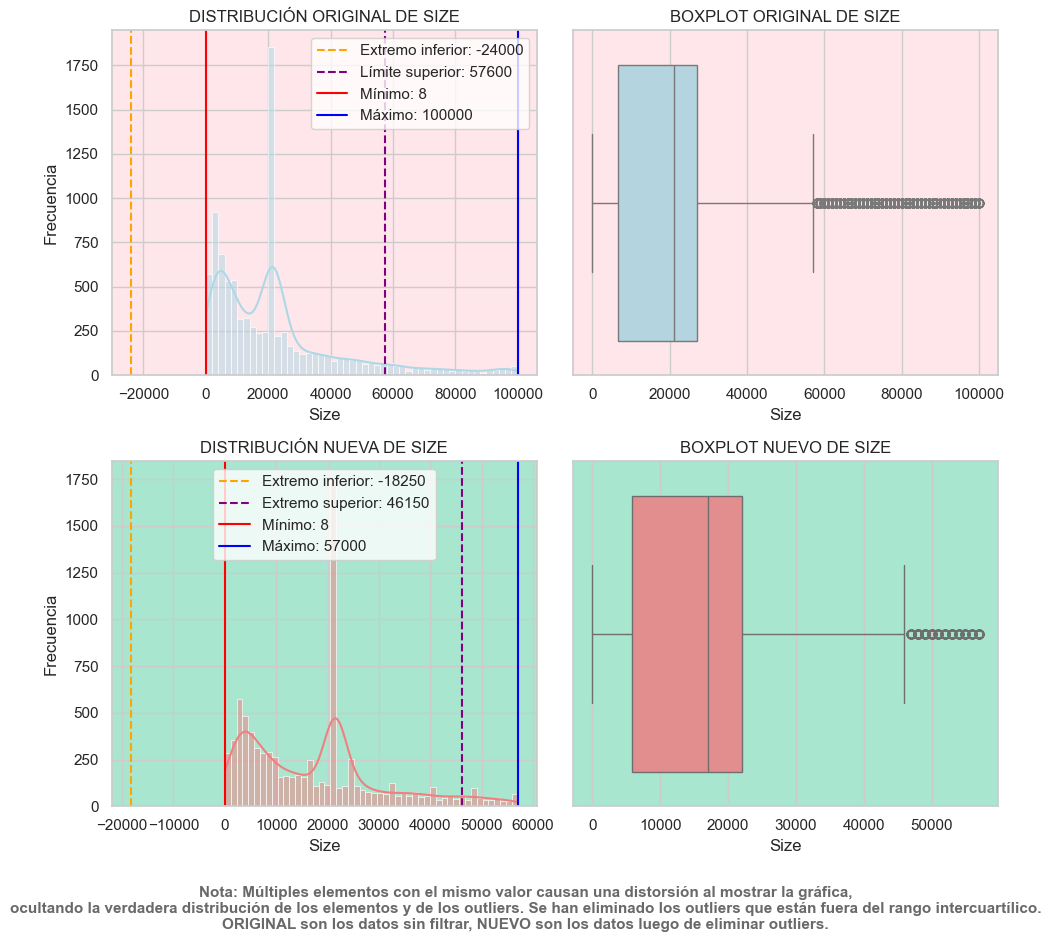

'ℹ️ 📊📊📊 ANÁLISIS Y GRÁFICO DE LA COLUMNA INSTALLS'

'ℹ️ REGISTROS ORIGINALES  SIN ELIMINAR OUTLIERS: 9353'

'ℹ️ Q1 ORIGINAL = 10000.0'

'ℹ️ Q3 ORIGINAL= 5000000.0'

'ℹ️ IQR ORIGINAL = 4990000.0'

'ℹ️ EXTREMO INFERIOR ORIGINAL= -7475000.0'

'ℹ️ EXTREMO SUPERIOR ORIGINAL = 12485000.0'

'ℹ️ MÁXIMO ORIGINAL= 5.0'

'ℹ️ MÍNIMO ORIGINAL = 1000000000.0'

'ℹ️ REGISTROS LUEGO DE ELIMINAR OUTLIERS: 8525'

'ℹ️ Q1 NUEVO = 10000.0'

'ℹ️ Q3 NUEVO= 1000000.0'

'ℹ️ IQR NUEVO = 990000.0'

'ℹ️ EXTREMO INFERIOR NUEVO = -1475000.0'

'ℹ️ EXTREMO SUPERIOR NUEVO = 2485000.0'

'ℹ️ MÁXIMO NUEVO = 5.0'

'ℹ️ MÍNIMO NUEVO = 10000000.0'

'ℹ️ TOTAL ELIMINADOS: 828'

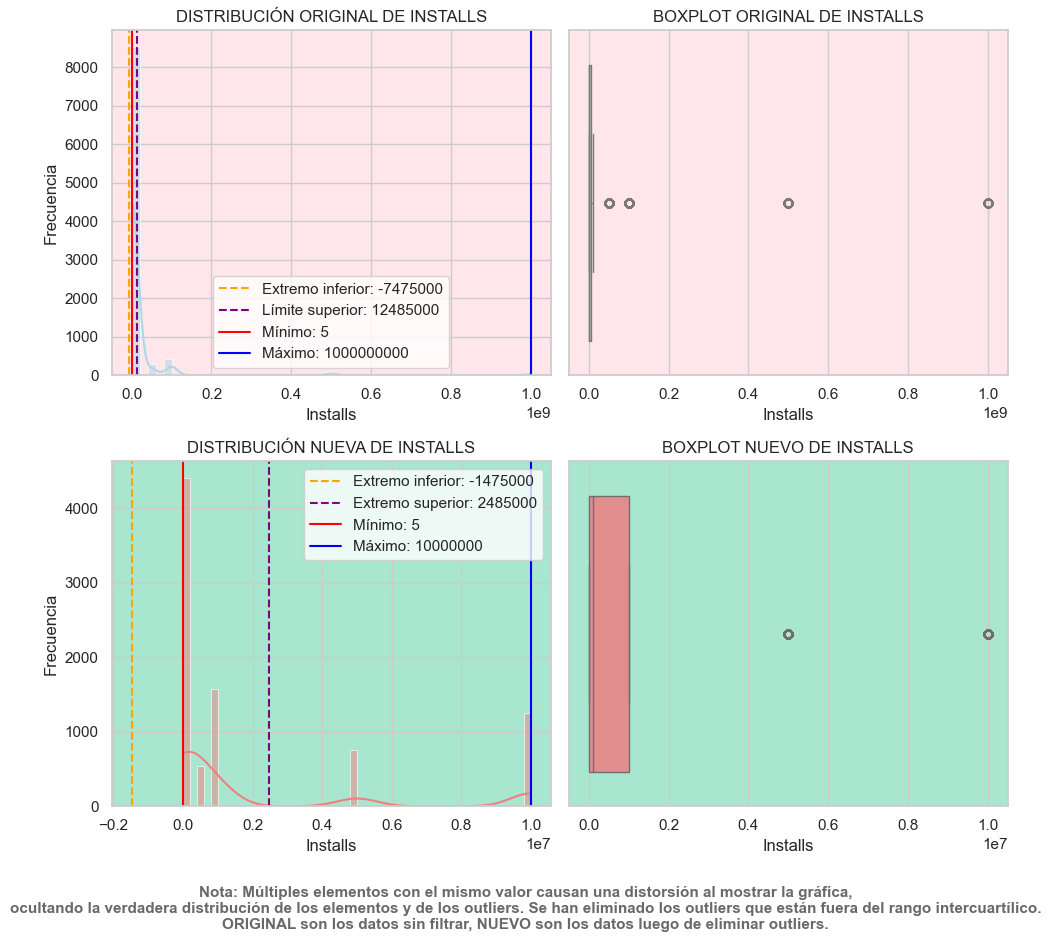

In [19]:
# Función para mostrar análisis de una columna específica. Para ahorrar en código se llama varias veces.
def ShowAnalysis(df, columna): 
    Q1 = df[columna].quantile(0.25)   
    Q3 = df[columna].quantile(0.75)   
    IQR = Q3 - Q1      
    ExtremoInferior = Q1 - 1.5 * IQR
    ExtremoSuperior = Q3 + 1.5 * IQR
    Minimum = df[columna].min()
    Maximum = df[columna].max()


    fig, axes = plt.subplots(2, 2, figsize=(10, 10))    
    ax1, ax2,ax3,ax4 = axes.flatten()

    ShowInfoMessage(f"📊📊📊 Análisis y gráfico de la columna {columna}")
    ShowInfoMessage(f"Registros originales  sin eliminar outliers: {len(df)}")
    ShowInfoMessage(f"Q1 Original = {Q1}")
    ShowInfoMessage(f"Q3 Original= {Q3}")
    ShowInfoMessage(f"IQR Original = {IQR}")
    ShowInfoMessage(f"Extremo Inferior Original= {ExtremoInferior}")
    ShowInfoMessage(f"Extremo Superior Original = {ExtremoSuperior}")
    ShowInfoMessage(f"Máximo Original= {Minimum}")
    ShowInfoMessage(f"Mínimo Original = {Maximum}")
    df_filtrado = df[(df[columna] >= ExtremoInferior) & (df[columna] <= ExtremoSuperior)]
    
    # Distribución previa
    sns.set_theme(style="whitegrid")
    sns.histplot(df[columna], bins=50, kde=True, ax=ax1, color="lightblue")
    ax1.set_facecolor("#ffe6ea")
    ax1.set_title(f"Distribución original de {columna}".upper())
    ax1.set_xlabel(f"{columna}")
    ax1.set_ylabel("Frecuencia")
    ax1.grid(True)
    ax1.axvline(ExtremoInferior, color='orange', linestyle='--', label=f"Extremo inferior: {int(ExtremoInferior)}")
    ax1.axvline(ExtremoSuperior, color='purple', linestyle='--', label=f"Límite superior: {int(ExtremoSuperior)}")
    ax1.axvline(Minimum, color='red', linestyle='-', label=f"Mínimo: {int(Minimum)}")
    ax1.axvline(Maximum, color='blue', linestyle='-', label=f"Máximo: {int(Maximum)}")
    ax1.legend()

    # BoxPlot previo
    sns.boxplot(x=df[columna], ax=ax2, color="lightblue")
    ax2.set_facecolor("#ffe6ea")
    ax2.set_title(f"BoxPlot original de {columna}".upper())
    ax2.set_xlabel(columna)

    
    Q1 = df_filtrado[columna].quantile(0.25)   
    Q3 = df_filtrado[columna].quantile(0.75)   
    IQR = Q3 - Q1      
    ExtremoInferior = Q1 - 1.5 * IQR
    ExtremoSuperior = Q3 + 1.5 * IQR
    Minimum = df_filtrado[columna].min()
    Maximum = df_filtrado[columna].max()

    ShowInfoMessage(f"Registros luego de eliminar outliers: {len(df_filtrado)}")
    ShowInfoMessage(f"Q1 Nuevo = {Q1}")
    ShowInfoMessage(f"Q3 Nuevo= {Q3}")
    ShowInfoMessage(f"IQR Nuevo = {IQR}")
    ShowInfoMessage(f"Extremo Inferior Nuevo = {ExtremoInferior}")
    ShowInfoMessage(f"Extremo Superior Nuevo = {ExtremoSuperior}")
    ShowInfoMessage(f"Máximo Nuevo = {Minimum}")
    ShowInfoMessage(f"Mínimo Nuevo = {Maximum}")
    display()
    ShowInfoMessage("Total eliminados: " + str(len(df) - len(df_filtrado)))

    # Distribución balanceada (sin outliers)
    ax3.set_facecolor("#A8E6CF")
    sns.histplot(df_filtrado[columna], bins=50, kde=True, ax=ax3, color="lightcoral")
    ax3.set_title(f"Distribución Nueva de {columna}".upper())
    ax3.set_xlabel(f"{columna}")
    ax3.set_ylabel("Frecuencia")
    ax3.grid(True)
    ax3.axvline(ExtremoInferior, color='orange', linestyle='--', label=f"Extremo inferior: {int(ExtremoInferior)}")
    ax3.axvline(ExtremoSuperior, color='purple', linestyle='--', label=f"Extremo superior: {int(ExtremoSuperior)}")
    ax3.axvline(Minimum, color='red', linestyle='-', label=f"Mínimo: {int(Minimum)}")
    ax3.axvline(Maximum, color='blue', linestyle='-', label=f"Máximo: {int(Maximum)}")
    ax3.legend()

    # BoxPlot balanceado
    sns.boxplot(x=df_filtrado[columna], ax=ax4, color="lightcoral")
    ax4.set_facecolor("#A8E6CF")
    ax4.set_title(f"BoxPlot Nuevo de {columna}".upper())
    ax4.set_xlabel(columna)

    plt.tight_layout(rect=[0, 0.08, 1, 0.96])  # deja 8% libre abajo

    fig.text(0.5, 0.02,
         "Nota: Múltiples elementos con el mismo valor causan una distorsión al mostrar la gráfica,\n"
         "ocultando la verdadera distribución de los elementos y de los outliers. Se han eliminado los outliers que están fuera del rango intercuartílico.\n" \
         "ORIGINAL son los datos sin filtrar, NUEVO son los datos luego de eliminar outliers.",
         ha='center', va="bottom", fontsize=11, color='dimgray', fontweight='bold')
    plt.show()

values = [["Price", data[data.Price > 0]], ["Reviews",data], ["Size",data], ["Installs", data]] # Columnas a analizar, para evitar repetir el código. # PRICE SOLO DE PAGO

dfOriginal = data.copy() # Respaldar el DataFrame limpiado

# Por cada columna, mostrar análisis
for value in values:
    ShowAnalysis(value[1], value[0])


# FASE 2️⃣ Visualización de datos para soportar la toma de decisiones

Preferiblemente usar seaborn para las gráficas y matplotlib para la personalización en caso de ser necesario.

In [20]:
ShowTableShape(data, "Data Final")
ShowTableHead(data, "Data Final", 10)

'ℹ️ DATA FINAL - Tamaño de los datos'

(9353, 13)

'ℹ️ DATA FINAL: Primeros 10 elementos.'

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000,50000.0,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000,1000000.0,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100,10000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3


En este punto deben iniciar a explorar las variables relevantes a las restricciones de la empresa. Es decir, importante relacionar la variable "Category" con columnas como "Price", "Rating", "Reviews", "Size" y "Installs". Piensen como cada columna se puede relacionar con las restriciones de la empresa.

Si no hay mucha claridad podemos hacer algunas visualizaciones generales. Por ejemplo identificar la relación entre el precio y las calificaciones. Será que aplicativos pagos y costosas tiene mejores reviews? Algo de esto podría servir para relacionar el orden de desarrollo de las aplicaciones con la rentabilidad a mediano plazo?

### **⁉️ Pregunta 4:** Qué gráfico puede usar para gráficar la relación entre precio y calificación?

> Para visualizar la relación entre el precio (`Price`) y la calificación (`Rating`) de las aplicaciones, el gráfico que mejor muestra esta información es el **gráfico de dispersión(scatterplot)**.
> 
> Este tipo de gráfico permite:
> 
> - Observar cómo se distribuyen las aplicaciones según su precio y calificación. Dependiendo de la distribución y la pendiente hipotética, puede evidenciar una relación inversa, directa o simplemente una dispersión amplia que indique poca relación lineal.
> - Identificar tendencias, agrupamientos o valores atípicos, propios de la dispersión de datos, haciendo visibles significativamente estos comportamientos.

### **⁉️ Pregunta 5:** Hay alguna relación importante?

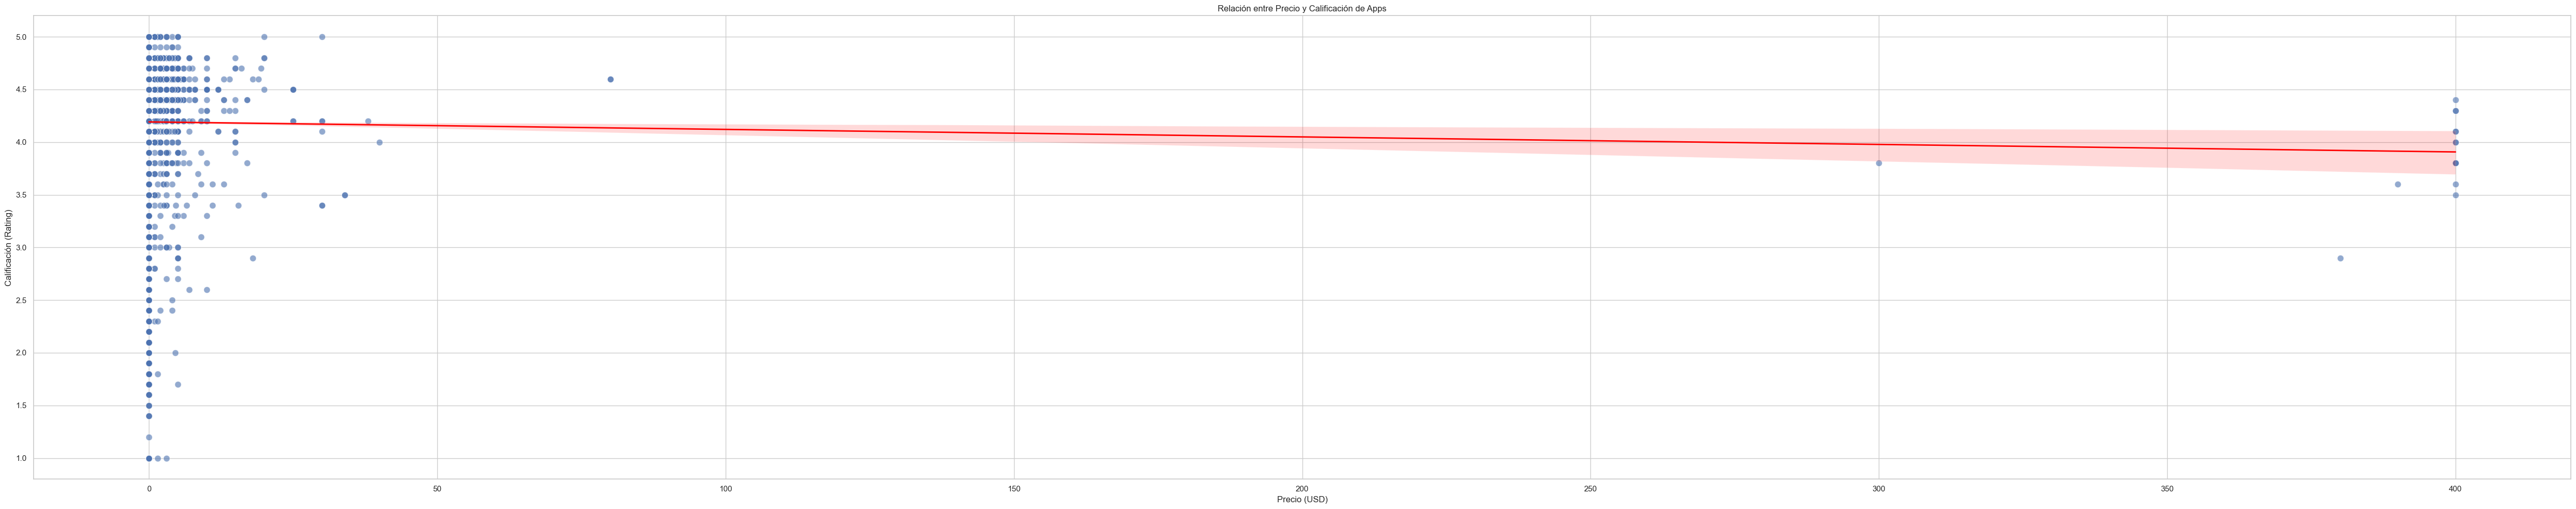

In [21]:
plt.figure(figsize=(50, 10))
# Puntos individuales
sns.scatterplot(data=data, x='Price', y='Rating', alpha=0.6, edgecolor='white', s=80)

# Línea de tendencia
sns.regplot(data=data, x='Price', y='Rating', scatter=False, color='red', line_kws={'linewidth':2})

# Títulos y etiquetas
plt.title('Relación entre Precio y Calificación de Apps')
plt.xlabel('Precio (USD)')
plt.ylabel('Calificación (Rating)')
plt.grid(True)
plt.tight_layout()
plt.show()


> #### Hallazgos esperados (según patrones comunes):

> - Las aplicaciones gratuitas suelen tener más reseñas y una mayor variedad de calificaciones, pero tienden a alcanzar puntuaciones altas. Pero se tienen que las apps gratuitas o de pago con precios bajos son la mayoría y hay pocas apps de pago con precios altos que se acercan a los 400USD.
> - Las aplicaciones de pago pueden tener menos reseñas, pero muestran calificaciones más altas, lo que sugiere mayor satisfacción, posiblemente debido a funcionalidades más completas o especializadas.
> - Algunas categorías específicas tienden a justificar su precio por la calidad que ofrecen (por ejemplo, Educación, Productividad o Salud).

**Bonus**: Cuando se dispone de varias variables numéricas, la realización de múltiples gráficos de dispersión resulta bastante tediosa. Por lo tanto, se prefiere una visualización por pares en la que todos los diagramas de dispersión se encuentran en una única vista en forma de matriz.

Seaborn permite esto fácilmente, tener en cuenta que:
*   Para las vistas no diagonales, se traza un diagrama de dispersión entre 2 variables numéricas.
*   Para las vistas diagonales, traza un histograma

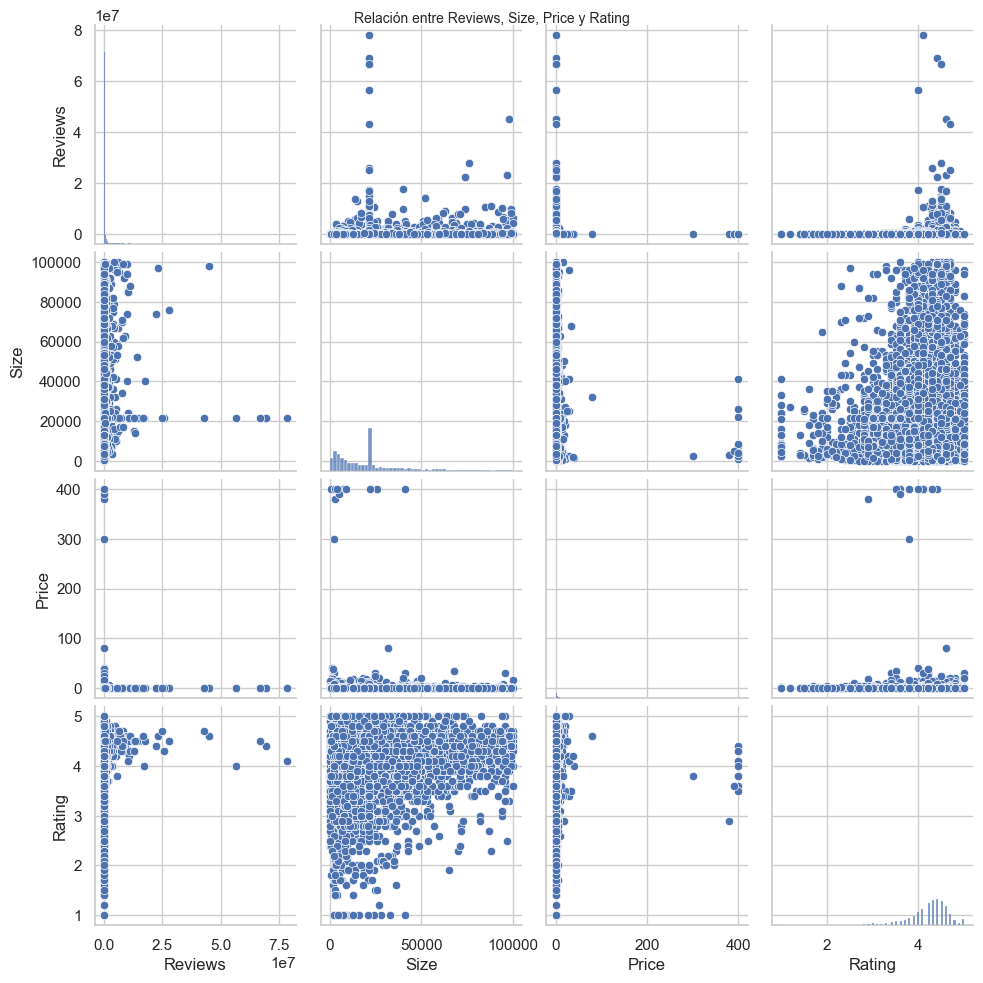

In [22]:
# filtrar los datos para que seaborn solo use las variables númericas que es desean
sns.pairplot(data[['Reviews', 'Size', 'Price','Rating']])
plt.suptitle('Relación entre Reviews, Size, Price y Rating', size=10)
plt.show()

Siguiendo con el análisis, sería de gran ayuda identificar la competencia que hay en la Google Store para cada categoría de las aplicaciones. Conocer la proporción de cada categoría nos podría indicar que sectores estan saturados de aplicativos. Qué crees?

### **⁉️ Pregunta 6:** Qué gráfico podriamos usar para visualizar esta proporción?

> Para visualizar proporcionalmente las aplicaciones donde hay mucha competencia o saturación de oferta en Google Play Store, se recomienda utilizar un **gráfico de barras horizontales** o un **gráfico de barras verticales**. Este tipo de gráfico permite comparar fácilmente cuántas aplicaciones hay en cada categoría, incluso cuando existen muchas categorías. Sin embargo, en este punto la legibilidad del gráfico será mejor con el **gráfico de barras horizontales**.
>
> También se puede usar un **gráfico de pastel** si se desea mostrar proporciones relativas, aunque es menos efectivo cuando hay más de seis categorías.
>
> **Ventajas del gráfico de barras horizontales:**
> - Claridad visual en categorías, incluso si son muchas. Si el número de categorías es excesivo, se recomienda segmentar y mostrar solo las más saturadas.
> - Fácil de leer y comparar.
> - Permite ordenar las categorías por cantidad de aplicaciones, ya sea ascendente o descendente.

### **⁉️ Pregunta 7:** Dónde hay más competencia?, que porcentajes?


Al analizar la distribución de aplicaciones por categoría, se observa que algunas están significativamente más saturadas que otras. Las categorías con mayor número de aplicaciones representan los sectores más competitivos.

> **Top 5 categorías con más competencia:**
> - `FAMILY`: 18.66% del total de aplicaciones   
? - `GAME`: 11.68%     
> - `TOOLS`: 7.93%
> - `PRODUCTIVITY`: 3.75%
> - `MEDICAL`: 3.73%
> 
> Estas cifras indican que las categorías como **FAMILY** y **GAME** están más saturadas, lo cual puede explicarse hipotéticamente porque son nichos grandes de mercado. Al ser más amplios, tienden a atraer más desarrolladores, lo que incrementa la competencia.
>
> **Implicación estratégica:**
> Las categorías con menor proporción podrían representar oportunidades de nicho. Sin embargo, también es posible que reflejen una baja demanda, por lo que se debe evaluar si vale la pena invertir en ellas.

'ℹ️ PROPORCIÓN DE APPS POR CATEGORÍA: Primeros 100 elementos.'

Category
FAMILY                 18.667807
GAME                    11.68609
TOOLS                   7.837058
PRODUCTIVITY            3.752807
MEDICAL                 3.731423
COMMUNICATION           3.506896
FINANCE                 3.453437
SPORTS                   3.41067
PHOTOGRAPHY             3.389287
LIFESTYLE                3.34652
PERSONALIZATION         3.335828
BUSINESS                3.239602
HEALTH_AND_FITNESS      3.175452
SOCIAL                  2.758473
SHOPPING                2.544638
NEWS_AND_MAGAZINES      2.491179
TRAVEL_AND_LOCAL        2.416337
DATING                  2.084893
BOOKS_AND_REFERENCE     1.903133
VIDEO_PLAYERS           1.710681
EDUCATION               1.657222
ENTERTAINMENT           1.593072
MAPS_AND_NAVIGATION     1.325778
FOOD_AND_DRINK          1.165401
HOUSE_AND_HOME          0.812574
WEATHER                 0.801882
AUTO_AND_VEHICLES       0.780498
LIBRARIES_AND_DEMO      0.684272
ART_AND_DESIGN          0.652197
COMICS                  0.620122
P

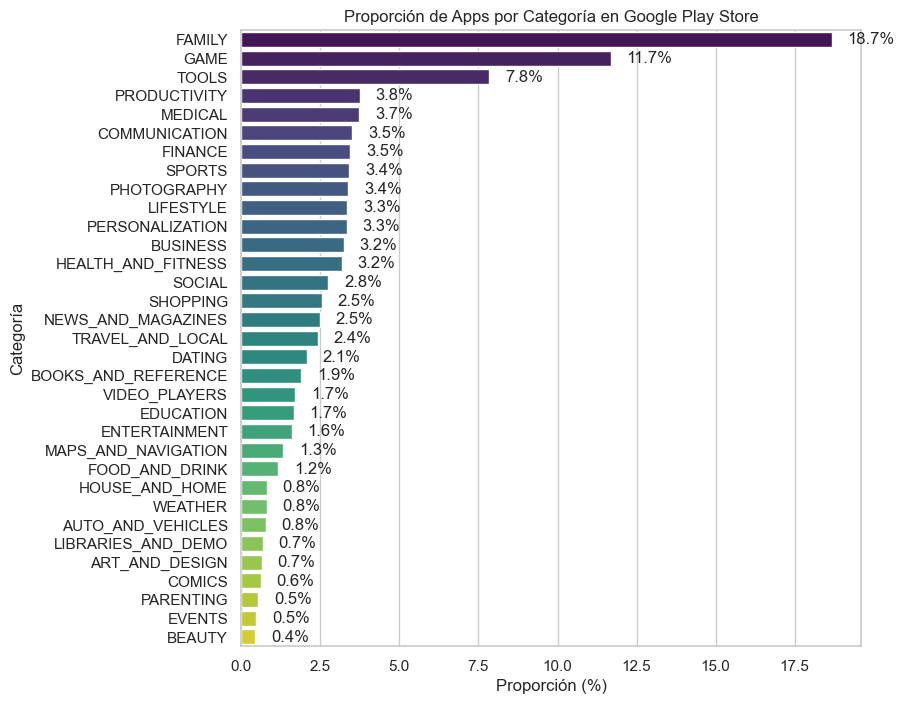

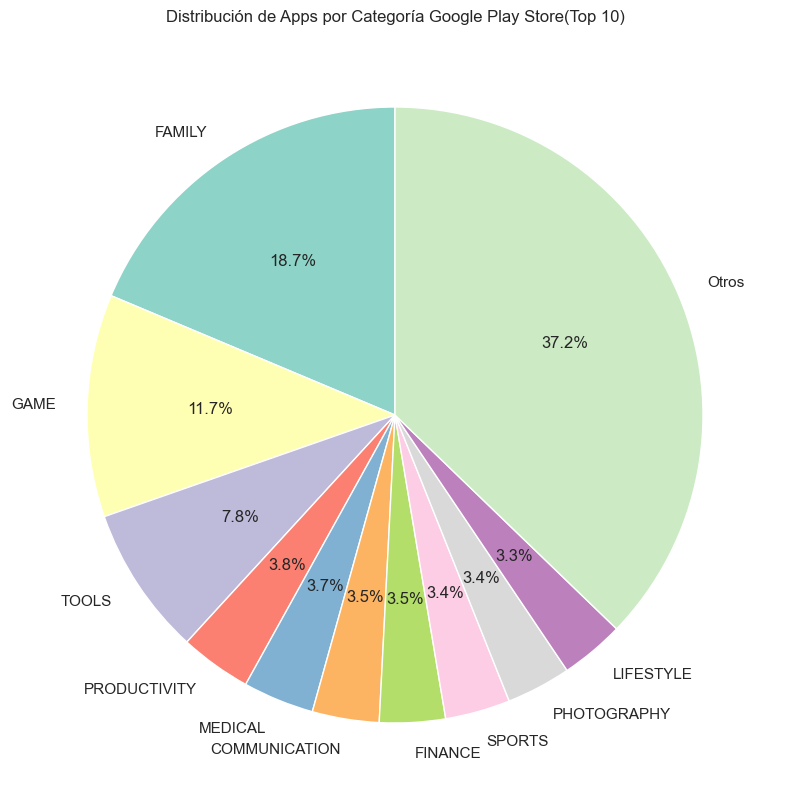

In [23]:
categorias = data["Category"].value_counts(normalize=True).sort_values(ascending=False) * 100
ShowTableHead(categorias, "Proporción de Apps por Categoría", 100)
plt.figure(figsize=(8, 8))
ax = sns.barplot(
    x=categorias.values,
    y=categorias.index,
    palette="viridis"
)
for i, v in enumerate(categorias.values):
    ax.text(v + 0.5, i, f"{v:.1f}%", va="center")

plt.title("Proporción de Apps por Categoría en Google Play Store")
plt.xlabel("Proporción (%)")
plt.ylabel("Categoría")
plt.show()


top10 = categorias.head(10)
resto = categorias.iloc[10:].sum()
categoriasPastel = pd.concat([top10, pd.Series({"Otros": resto})])
colores = sns.color_palette("Set3", n_colors=len(categoriasPastel))
plt.figure(figsize=(10, 10))
plt.pie(
    categoriasPastel,
    labels=categoriasPastel.index,
    autopct="%.1f%%",
    startangle=90,
    colors=colores
)
plt.title("Distribución de Apps por Categoría Google Play Store(Top 10)")
plt.show()



En este punto podemos continuar relacionando la variable categoría con las otras variables para seguir descubriendo elementos relevantes. Que tal si ahora, nos centramos en tratar de descrifrar como podemos medir la ganancia de reconocimiento rápidamente de las categorías? será que el número de instalaciones nos podría medir si esa categoría potencialmente puede ganar reconocimiento por la cantidad de instalaciones que tienen?

Por otro lado, vimos que aplicaciones gratuitas tienden a tener reviews más altos, para profundizar, podríamos revisar la relación que tiene el precio con las aplicaciones por categoría, nos daría esto indicios acerca de cual sector es más rentable o genera más ingresos?

### **⁉️ Pregunta 8:** Qué gráfico permite evidenciar cantidades en un conjunto de categorías?

Para visualizar cantidades dentro de un conjunto de categorías, se podría una variedad de gráficos como los siguientes:

> - **Gráfico de barras (verticales u horizontales):**  
>  Ideal para mostrar frecuencias absolutas (cantidad de instalaciones o cantidad de aplicaciones por categoría). Las barras horizontales son más legibles cuando los nombres de las categorías o el conjunto de datos es más amplio.
>
> - **Gráfico de cajas (boxplot):**  
>  Puede ser útil  cuando se desea visualizar la distribución de variables como precios o instalaciones por categoría. Permite identificar medianas, rangos intercuartílicos y valores los outliers.
>
> - **Gráfico de violín:**  
>  Similar al boxplot pero con una representación más visual muy descriptiva de la desidad, se aplicaría muy bien el el punto anteror sobre ver que tan densa está una categoría.
>
>- **Gráfico de dispersión con color por categoría:**  
>  Permite cruzar variables (por ejemplo, precio vs. instalaciones) y usar el color para representar la categoría. Ayuda a detectar correlaciones entre variables.
>
> La elección del gráfico depende en sí de lo que se quiera mostrar sobre la categoría, así que temos que elegirlo dependiendo que queremos evidenciar.

### **⁉️ Pregunta 9:** Cuál es la categoría con un número mayor de instalaciones y por cual categoría en promedio se paga un precio más alto?

> La categoría con mayor número de instalaciones es **COMMUNICATION**   
> La categoría en la cual se paga más en promedio es **FINANCE**    

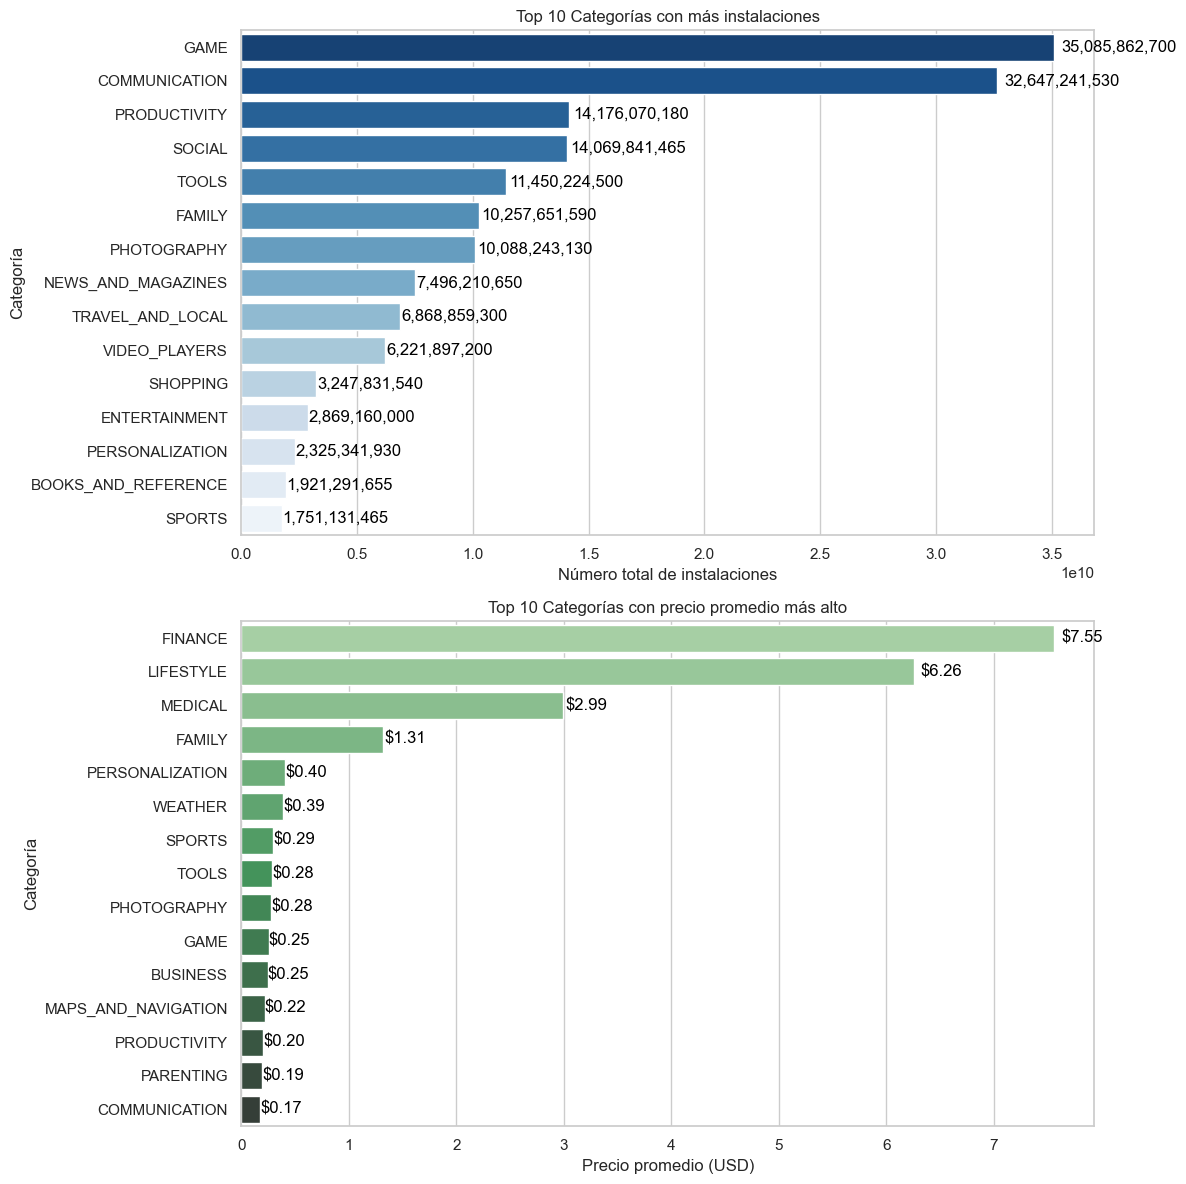

In [24]:
# Número total de instalaciones por categoría
installs_by_cat = data.groupby("Category")["Installs"].sum().reset_index()
installs_top10 = installs_by_cat.sort_values("Installs", ascending=False).head(15)

# Precio promedio por categoría
price_by_cat = data.groupby("Category")["Price"].mean().reset_index()
price_top10 = price_by_cat.sort_values("Price", ascending=False).head(15)

# Crear figura con 2 filas y 1 columna
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# --- Gráfico 1: Total de instalaciones por categoría ---
sns.barplot(
    data=installs_top10,
    x="Installs",
    y="Category",
    palette="Blues_r",
    ax=axes[0]
)
axes[0].set_title("Top 10 Categorías con más instalaciones")
axes[0].set_xlabel("Número total de instalaciones")
axes[0].set_ylabel("Categoría")

# Agregar valores al final de cada barra
for i, v in enumerate(installs_top10["Installs"]):
    axes[0].text(v + 0.01*v, i, f"{int(v):,}", color='black', va='center')

# --- Gráfico 2: Precio promedio por categoría ---
sns.barplot(
    data=price_top10,
    x="Price",
    y="Category",
    palette="Greens_d",
    ax=axes[1]
)
axes[1].set_title("Top 10 Categorías con precio promedio más alto")
axes[1].set_xlabel("Precio promedio (USD)")
axes[1].set_ylabel("Categoría")

# Agregar valores al final de cada barra
for i, v in enumerate(price_top10["Price"]):
    axes[1].text(v + 0.01*v, i, f"${v:.2f}", color='black', va='center')

plt.tight_layout()
plt.show()

En este punto deberíamos tener un poco más claro cual aplicación debería desarrollarse primero. Sin embargo, podemos analizar aspectos como desarrollo rápido del tipo de aplicación, ya que la empresa no cuenta con un amplio personal de desarrollo. Crees que el tamño del aplicativo "size" nos puede servir como criterio para decidir si una aplicación se puede desarrollar rápidamente, sin la necesidad de varios desarrolladores? Además, de manera similar podríamos pensar que la distribución de rating por categoría me puede brindar información de cuáles sectores tienen mayor exigencia en la calidad de las aplicaciones desarrolladas, Crees que la experiencia de algunos desarrolladores en el sector productivo nos da una ventaja en este sentido?


### **⁉️ Pregunta 10:** Qué gráficos son adecuados para visualizar estas distribuciones de manera detallada? Cómo podemos comparar las distribuciones?

## Comparación de distribuciones por categoría (PRODUCTIVITY, MEDICAL, GAME)

Para analizar cómo se distribuyen ciertas características entre diferentes categorías de aplicaciones como **PRODUCTIVITY**, **MEDICAL** y **GAME**, estos gráficos pueden ser especialmente útiles:

### Distribución del tamaño de la app (Size)

- **Boxplot (diagrama de caja):**  
  Muestra la mediana, los cuartiles y posibles valores atípicos (outliers). Es ideal para observar los rangos y detectar si alguna categoría tiende a tener apps más pesadas o más livianas, especialmente visible a través de los outliers.

- **Violin plot:**  
  Similar al boxplot, pero además incorpora la densidad de los datos. Esto permite visualizar mejor la forma de la distribución y detectar dónde se concentra la mayoría de los tamaños.

- **Histogramas por categoría:**  
  Útiles para observar la frecuencia absoluta de ciertos rangos de tamaño dentro de cada categoría. Permiten comparar visualmente si una categoría tiene mayor concentración de apps en determinados tamaños.

---

### Distribución de la calificación (Rating)

- **Boxplot por categoría:**  
  Permite comparar si alguna categoría suele tener calificaciones más altas, más bajas o más dispersas. Esto puede reflejar diferentes niveles de exigencia o satisfacción por parte de los usuarios.

- **KDE plot (Kernel Density Estimation):**  
  Muestra la densidad de las calificaciones de forma suavizada, facilitando la lectura e interpretación. Es muy útil para identificar si hay concentración de ratings en ciertas partes del rango (por ejemplo, si la mayoría de las apps están cerca del 5.0).

- **Swarmplot o Stripplot:**  
  Representan cada punto individual. Son útiles para detectar patrones específicos y observar la distribución completa de los valores.  
  - **Swarmplot** es ideal para datasets pequeños o medianos, ya que evita la superposición de puntos.  
  - **Stripplot** funciona mejor con conjuntos de datos grandes, aunque puede superponer puntos (puede mejorarse con `jitter` y `alpha`).  
  Es importante considerar el rendimiento: Swarmplot puede requerir más recursos computacionales.


### **⁉️Pregunta 11:** Qué categoría tiene en promedio un tamaño de app mayor? cuál categoría presenta un sector más exigente?

Al observar las gráficas de distribución de tamaño (`Size`) y calificación (`Rating`) por categoría, se aprecia que las aplicaciones de la categoría `GAME` presentan un tamaño más uniforme y, en promedio, mayor que las demás. Esto puede deberse a que los juegos suelen incluir gráficos, sonidos y funcionalidades más pesadas.

Por otro lado, las categorías `MEDICAL` y `PRODUCTIVITY` tienden a tener aplicaciones más livianas, con tamaños relativamente uniformes. Sin embargo, ambas muestran la presencia de **outliers**, es decir, algunas apps con tamaños significativamente mayores o menores que el promedio, lo cual no ocurre en la categoría `GAME`.

En cuanto a la exigencia del sector, se puede inferir que `PRODUCTIVITY` presenta una mayor exigencia en calidad, ya que sus aplicaciones muestran una distribución de calificaciones más concentrada en valores altos, lo que indica que los usuarios tienen expectativas claras y valoran la funcionalidad y estabilidad. `MEDICAL` también muestra una tendencia similar, aunque con mayor dispersión.

Estas observaciones pueden ayudar a tomar decisiones estratégicas sobre qué tipo de aplicación desarrollar primero, considerando tanto la complejidad técnica como las expectativas del usuario.

Por otra parte aunque las App MEDICAL presenta más variabilidad en las calificaciones, las app de categoría PRODUCTIVITY parece ser la más exigente, ya que tiene una mediana más baja y una cantidad  de outliers hacia valores de calificación más bajos, lo cual puede indicar que es más difícil obtener buenas calificaciones en esta categoría. Sin embargo, se necesitaría hacer un análisis más profundo para que está afirmación sea ratificada, poniendo otras medidas de tendencia central o hacer un conteo de los ouliers de cada una de las 2 categorías.

**hint:** Solo compara las categorías de interés: "PRODUCTIVITY", "MEDICAL", "GAME"


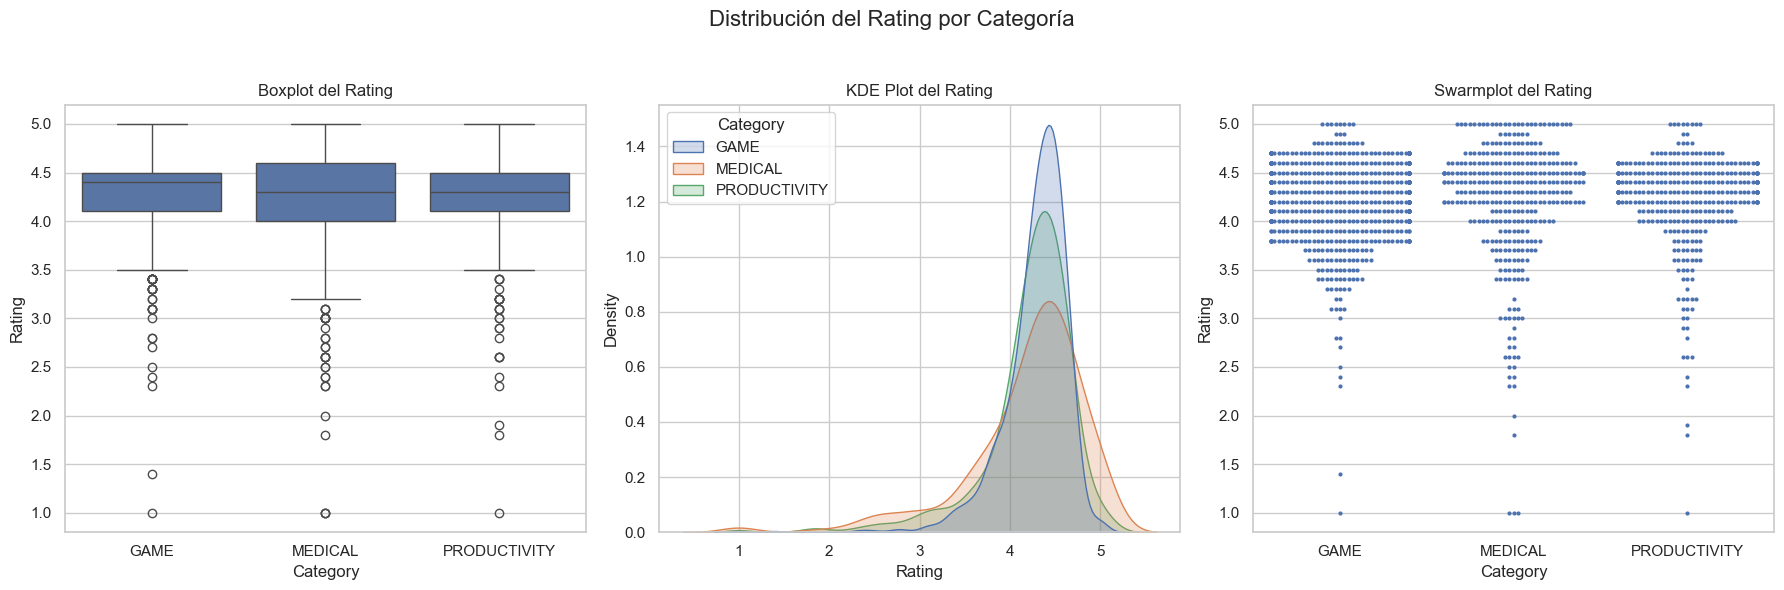

In [25]:
categorias_interes = ['PRODUCTIVITY', 'MEDICAL', 'GAME']
df_rating = data[data['Category'].isin(categorias_interes)].copy()

# Asegurarse de que 'Rating' es numérico
df_rating['Rating'] = pd.to_numeric(df_rating['Rating'], errors='coerce')

# Eliminar valores nulos en Rating
df_rating = df_rating.dropna(subset=['Rating'])

# Estilo general
sns.set(style="whitegrid")

# Crear subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribución del Rating por Categoría', fontsize=16)

# Boxplot
sns.boxplot(data=df_rating, x='Category', y='Rating', ax=axs[0])
axs[0].set_title('Boxplot del Rating')

# KDE plot
sns.kdeplot(data=df_rating, x='Rating', hue='Category', common_norm=False, fill=True, ax=axs[1])
axs[1].set_title('KDE Plot del Rating')

# Swarmplot (puede cambiarse por stripplot si hay muchos datos)
sns.swarmplot(data=df_rating, x='Category', y='Rating', ax=axs[2], size=3)
axs[2].set_title('Swarmplot del Rating')

# Ajuste final
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

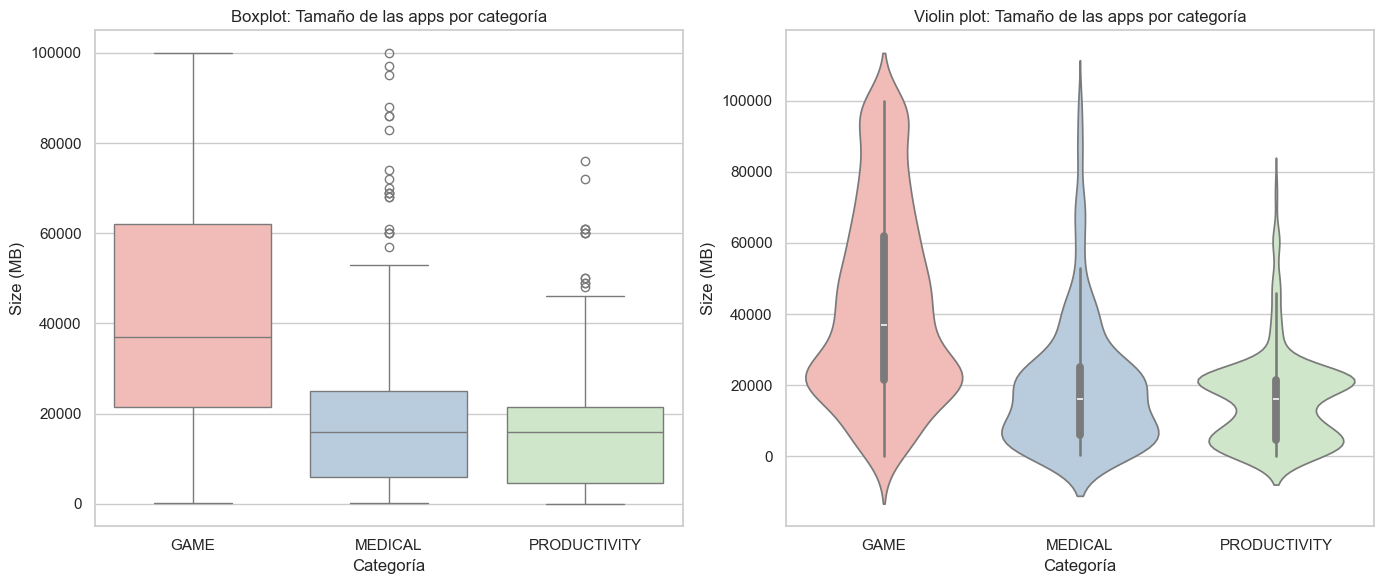

Promedio de Size por categoría:
Category
GAME            42769.662397
MEDICAL         19555.432665
PRODUCTIVITY     15747.54416
Name: Size, dtype: Float64


In [26]:
# Categorías de interés
categories_of_interest = ["PRODUCTIVITY", "MEDICAL", "GAME"]
subset = data[data["Category"].isin(categories_of_interest)]

##### Gráfico Size #####
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot de Size
sns.boxplot(x="Category", y="Size", data=subset, palette="Pastel1", ax=axes[0])
axes[0].set_title("Boxplot: Tamaño de las apps por categoría")
axes[0].set_xlabel("Categoría")
axes[0].set_ylabel("Size (MB)")

# Violin plot de Size
sns.violinplot(x="Category", y="Size", data=subset, palette="Pastel1", ax=axes[1])
axes[1].set_title("Violin plot: Tamaño de las apps por categoría")
axes[1].set_xlabel("Categoría")
axes[1].set_ylabel("Size (MB)")

plt.tight_layout()
plt.show()

# Promedio de Size por categoría
size_avg = subset.groupby("Category")["Size"].mean()
print("Promedio de Size por categoría:")
print(size_avg)

## FASE 3️⃣ CONCLUSIONES Y SUGERENCIAS FINALES

Llegamos al final de nuestro análisis, como vimos se intentó relacionar la categoría a la que pertenecen las aplicaciones en el roadmap con variables que me pueden ayudar a cumplir las restricciones de la compañía, resumen:


1.   Cantidad de aplicaciones en la google store por categoría para cuantificar la competencia en cada sector.
2.   Cantidad de instalaciones de las app por categoría para abordar un posible crecimiento portencial o popularidad de las apps en cada categoría.
3. Precio promedio de pago por las apps en cada categoría para evaluar la rentabilidad en cada sector.
4. Tamaño de las apps por sector para evaluar la cantidad de recurso humano necesario para salir al mercado con una versión.
5. Rating por categoría como forma de evaluar la exigencia del sector y aprovechar la experiencia del equipo.

### **⁉️ Pregunta 12:** Cuál es el orden que van a proponer a los líderes de la empresa? qué sistema de calificación o criterios usaron para fijar ese orden?


## 🧭 Priorización de categorías para desarrollo de aplicaciones

### Orden propuesto:
1. **GAME**  
2. **MEDICAL**  
3. **PRODUCTIVITY**

---

### 🔍 Criterios utilizados para la priorización

La propuesta se construyó evaluando las categorías según cinco criterios clave, alineados con las **restricciones y necesidades de la empresa**:

1. **Competencia (saturación en Google Play Store)**  
   Se observó que `GAME` es una categoría muy popular, pero no tan saturada como `FAMILY`. En cambio, `PRODUCTIVITY` y `MEDICAL` tienen menos competencia y no muestran tanta saturación. Existen nichos como `BEAUTY` o `EVENTS` que no están saturados, pero eso no garantiza que sean oportunidades reales, ya que depende de la demanda efectiva que generan.

2. **Popularidad (cantidad de instalaciones)**  
   `FAMILY` y `GAME` lideran en volumen de instalaciones, lo que indica **alta demanda y potencial de crecimiento**. Esto representa una buena oportunidad para ganar visibilidad en mercados amplios. Nunca hay el juego definitivo y nunca hay la aplicación final o completa para las necesidades de una familia. Estas dos categorías ofrecen un amplio espectro de necesidades a cubrir todo depende del contexto geográfico y nicho de mercado.

3. **Rentabilidad (precio promedio de apps)**  
   Aunque el precio promedio es bajo en general, se identificó que categorías como `PERSONALIZATION` tienen precios más altos. Sin embargo, dentro del conjunto de interés, `PRODUCTIVITY` y `MEDICAL` no destacan por su rentabilidad. Se recomienda afinar el análisis estadístico para validar estas observaciones.

4. **Facilidad de desarrollo (tamaño promedio de la app)**  
   `PRODUCTIVITY` y `MEDICAL` tienen, en promedio, apps más pequeñas que `GAME`. Aunque `GAME` posee más descargas, lo que podría justificar el esfuerzo de desarrollo, las otras dos categorías podrían implicar menor tiempo de salida al mercado. No obstante, el conocimiento del negocio en `PRODUCTIVITY` y `MEDICAL` puede ser un factor diferenciador clave.

5. **Exigencia del sector (ratings y outliers negativos)**  
   Se encontró que `PRODUCTIVITY` tiene una mediana de rating más baja y varios outliers negativos, lo que sugiere un **sector más exigente** en términos de calidad. Esto implica mayor esfuerzo para satisfacer las expectativas del usuario. Por el contrario, `GAME` mostró una distribución más estable en ratings, lo que representa un **entorno menos riesgoso** para invertir.

---

### 📌 Conclusión y propuesta estratégica

Dado que la empresa cuenta con **recursos humanos limitados**, se propone comenzar por una app de la categoría **GAME**, ya que:

- Tiene una probabilidad más alta de descarga (muchas instalaciones).
- No es la más saturada, pero está en segundo lugar después de `FAMILY`, lo que implica que la visibilidad debe ser una prioridad estratégica.
- Los usuarios no son tan exigentes, lo que representa una ventaja en términos de calificaciones.
- Aunque su tamaño promedio puede ser mayor, los puntos anteriores justifican apuntar a este nicho.
- Permiten muchos mecanismos de ingresos monetarios adicionales.

Se puede iniciar por una aplicación gratuita **GAME**(FreeToPlay) y dentro de la app establecer mecanismos para monetizar y obtener réditos para sostener el desarrollo como son:
- Venta de items cosméticos ya sean para el juego o para personajes del juego.
- Venta de items para mejorar la jugabilidad o hacer más fácil la jugabilidad(PayToWin).
- Venta de los items que los jugadores consiguen en la app, establecer un mercado de la comunidad al estilo Steam o EpicGamesStore.
- Venta de packs o bundles cosméticos, musicales, skins.
- Venta de accesos a items exclusivos de temporada o eventos especiales únicos.
- Suscripciones a servicios adicionales in game como puede ser telemetría o ayuda de IA basado en estadísticas de juego.

En el caso de video juegos la variedad es amplia, como desventaja se tiene que tener un equipo especializado en distintas áreas como diseño 3D, diseño 2D, creación de texturas, programación, composición musical, arte y creación de personajes, creación del guión e historia/lore del game. 

Posteriormente, se recomienda explorar un nicho más especializado como **MEDICAL**, una vez que se cuente con mayor conocimiento del negocio. Estas apps suelen tener menor peso y podrían requerir menos tiempo de desarrollo, aunque los usuarios pueden ser más críticos, por lo que se debe apuntar a la calidad desde el inicio.

Finalmente, como tercera opción se sugiere desarrollar una app de **PRODUCTIVITY**, que aunque se alinea con la experiencia del equipo multidisciplinario, representa un mayor reto por la alta exigencia de los usuarios. Los gráficos muestran que algunas apps cumplen con las expectativas, mientras otras caen en los outliers negativos, y el riesgo sería convertirse en una de ellas.

